# How can I obtain the output of an intermediate layer?

In [2]:
# from keras.models import Model

# model = ...  # create the original model

# layer_name = 'my_layer'
# intermediate_layer_model = Model(inputs=model.input,
#                                  outputs=model.get_layer(layer_name).output)
# intermediate_output = intermediate_layer_model.predict(data)

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.models import load_model
from keras import Model
import numpy as np
import utils
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000

In [4]:
# model to predict
model = load_model('model_1_2.h5')

In [13]:
for layer in model.layers:
    print(layer.name)

conv2d_1
batch_normalization_1
activation_1
max_pooling2d_1
conv2d_2
batch_normalization_2
activation_2
conv2d_3
batch_normalization_3
activation_3
max_pooling2d_2
flatten_1
dense_1
batch_normalization_4
activation_4
dropout_1
dense_2
activation_5


In [5]:
train_data_path = '/home/ec2-user/Capstone_Project/code/left-pca16' # Full path should be given here 
train_mask_path = 'mask_updated/train/'
test_data_path = '/home/ec2-user/Capstone_Project/code/right-pca16' # Full path should be given here 
test_mask_path = 'mask_updated/test/'

In [6]:
X, Y, num_bands = utils.load_data(data_path = test_data_path, 
                                           masks_path = test_mask_path, 
                                           crop_size = 33, 
                                           num_classes = 6, 
                                           samples = 10, 
                                           balance = True)

In [9]:
X.shape

(60, 33, 33, 16)

In [7]:
# Take one data point
data = X[1,:,:,:]

In [8]:
data.shape

(33, 33, 16)

In [10]:
data = data[np.newaxis,:]

In [11]:
data.shape   # input shape for 

(1, 33, 33, 16)

In [18]:
def conv_output_visual(model,layer_name,data):
    # Give only one data : shape (1,cropsize,cropsize,bands)
    
    intermediate_layer_model = Model(inputs=model.input,
                                     outputs=model.get_layer(layer_name).output)
    intermediate_output = intermediate_layer_model.predict(data)
    number_of_outputs = intermediate_output.shape[3]
    fig, axs = plt.subplots(number_of_outputs, 1, figsize=(3, 3*number_of_outputs))
    for i in range(number_of_outputs):
        axs[i].imshow(intermediate_output[0,:,:,i],cmap='gray')
        axs[i].xaxis.set_major_locator(plt.NullLocator())  # remove xticks and yticks
        axs[i].yaxis.set_major_locator(plt.NullLocator())

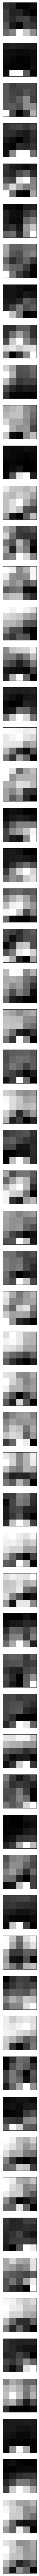

In [21]:
layer_name = 'max_pooling2d_2'
conv_output_visual(model,layer_name,data)